In [1]:
"""import necessary library"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
"""reading csv file"""
p1 = pd.read_csv('Q3_first_part_data.csv')
# rename the columns
p1 = p1.rename(columns={'Force(N)': 'f', 'voltage(mv)': 'v'})

# mx + c linear plot

coefficients:
[0.96908216 1.27142099]
Covariance:
[[ 1.24053509e-03 -6.14064857e-02]
 [-6.14064857e-02  4.07329614e+00]]


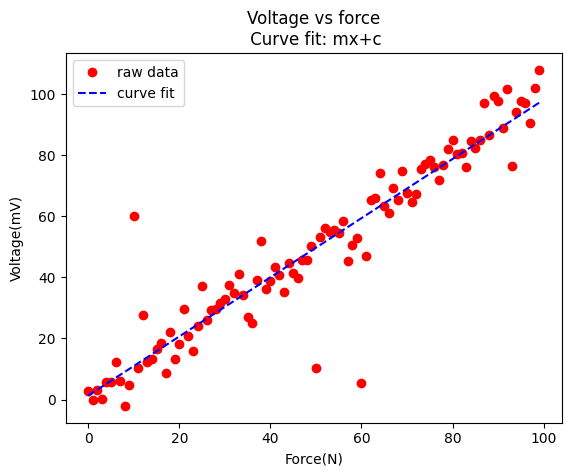

In [3]:
def func(x, a, b):
    return a*x + b

param, param_cov = curve_fit(func, p1["f"], p1["v"])
print("coefficients:")
print(param)
print("Covariance:")
print(param_cov)
 
v_tcap = param[0]*p1["f"] + param[1]
 
plt.plot(p1["f"], p1["v"], 'o', color ='red', label ="raw data")
plt.plot(p1["f"], v_tcap, '--', color ='blue', label ="curve fit")
plt.xlabel("Force(N)")
plt.ylabel("Voltage(mV)")
plt.title("Voltage vs force\n Curve fit: mx+c")
plt.legend()
plt.show()

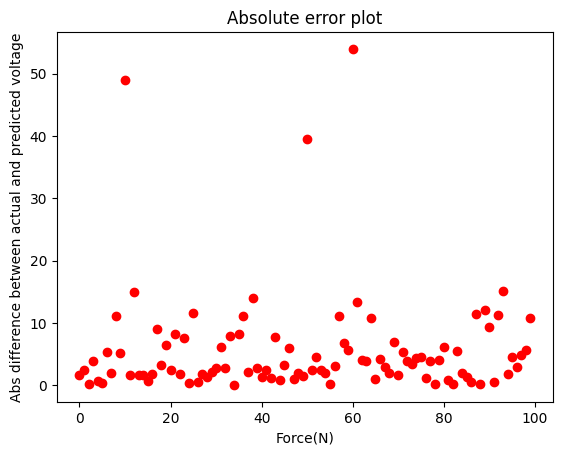

In [4]:
# p1.f.describe(percentiles=[0.05,0.95])
_diff = abs(p1.v - v_tcap)
_err_f = _diff/100
plt.plot(p1['f'], _diff, 'o', color ='red', label ="data")
plt.xlabel("Force(N)")
plt.ylabel("Abs difference between actual and predicted voltage")
plt.title("Absolute error plot")
plt.show()
lower_bound, upper_bound =  np.percentile(_diff, [0, 95])

In [5]:
# remove outliers
# _df = p1["f"][_diff < upper_bound]
_max_er = np.percentile(_diff, 95)
# print("Accuracy of the model is:", _max_er.max())
# 52.3 mV
print("The maximum error is:", _max_er)
# _value = param[0]*p1["f"] + param[1] 
_force = (52.3 - param[1])/param[0]
print(f"The force at 52.3mV is from {_force + _max_er}: to {_force - _max_er}")

_forces = [_force + _max_er, _force - _max_er]

# calculate the standard deviation
_sd = np.std(_forces)
# print("The standard deviation is:", _sd)


The maximum error is: 14.02706850457919
The force at 52.3mV is from 66.68367593351635: to 38.62953892435798
